# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'yahoo', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API.
------------

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [3]:
# Read in the stock symbols from the source of 'stooq', acording to https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
bank_stocks = data.DataReader(tickers, 'yahoo', start, end)
# The column indices come in at Attributes / Symbols and I want to reverse them
bank_stocks.columns = bank_stocks.columns.swaplevel(0, 1)
bank_stocks.sort_index(axis=1, level=0, inplace=True)
bank_stocks.head()

Symbols           BAC                                                          \
Attributes  Adj Close      Close       High        Low       Open      Volume   
Date                                                                            
2006-01-03  35.054218  47.080002  47.180000  46.150002  46.919998  16296700.0   
2006-01-04  34.681938  46.580002  47.240002  46.450001  47.000000  17757900.0   
2006-01-05  34.726604  46.639999  46.830002  46.320000  46.580002  14970700.0   
2006-01-06  34.674480  46.570000  46.910000  46.349998  46.799999  12599800.0   
2006-01-09  34.696808  46.599998  46.970001  46.360001  46.720001  15619400.0   

Symbols              C                                      ...         MS  \
Attributes   Adj Close       Close        High         Low  ...       High   
Date                                                        ...              
2006-01-03  440.882477  492.899994  493.799988  481.100006  ...  58.490002   
2006-01-04  432.742950  483.799988  491.000000  483.500000  ...  59.279999   
2006-01-05  434.889679  486.200012  487.799988  484.000000  ...  58.590000   
2006-01-06  434.889679  486.200012  489.000000  482.000000  ...  58.849998   
2006-01-09  432.832489  483.899994  487.399994  483.000000  ...  59.290001   

Symbols                                            WFC                        \
Attributes        Low       Open     Volume  Adj Close      Close       High   
Date                                                                           
2006-01-03  56.740002  57.169998  5377000.0  20.408512  31.900000  31.975000   
2006-01-04  58.349998  58.700001  7977800.0  20.171795  31.530001  31.820000   
2006-01-05  58.020000  58.549999  5778000.0  20.149401  31.495001  31.555000   
2006-01-06  58.049999  58.770000  6889800.0  20.267757  31.680000  31.775000   
2006-01-09  58.619999  58.630001  4144500.0  20.264565  31.674999  31.825001   

Symbols                                       
Attributes        Low       Open      Volume  
Date                                          
2006-01-03  31.195000  31.600000  11016400.0  
2006-01-04  31.365000  31.799999  10870000.0  
2006-01-05  31.309999  31.500000  10158000.0  
2006-01-06  31.385000  31.580000   8403800.0  
2006-01-09  31.555000  31.674999   5619600.0  

[5 rows x 36 columns]

** Set the column name levels to more appropriate names **

In [4]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

** Check the head of the bank_stocks dataframe.**

In [5]:
bank_stocks.head()

Bank Ticker        BAC                                              \
Stock Info   Adj Close      Close       High        Low       Open   
Date                                                                 
2006-01-03   35.054218  47.080002  47.180000  46.150002  46.919998   
2006-01-04   34.681938  46.580002  47.240002  46.450001  47.000000   
2006-01-05   34.726604  46.639999  46.830002  46.320000  46.580002   
2006-01-06   34.674480  46.570000  46.910000  46.349998  46.799999   
2006-01-09   34.696808  46.599998  46.970001  46.360001  46.720001   

Bank Ticker                       C                                      ...  \
Stock Info       Volume   Adj Close       Close        High         Low  ...   
Date                                                                     ...   
2006-01-03   16296700.0  440.882477  492.899994  493.799988  481.100006  ...   
2006-01-04   17757900.0  432.742950  483.799988  491.000000  483.500000  ...   
2006-01-05   14970700.0  434.889679  486.200012  487.799988  484.000000  ...   
2006-01-06   12599800.0  434.889679  486.200012  489.000000  482.000000  ...   
2006-01-09   15619400.0  432.832489  483.899994  487.399994  483.000000  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        High        Low       Open     Volume  Adj Close      Close   
Date                                                                            
2006-01-03   58.490002  56.740002  57.169998  5377000.0  20.408512  31.900000   
2006-01-04   59.279999  58.349998  58.700001  7977800.0  20.171795  31.530001   
2006-01-05   58.590000  58.020000  58.549999  5778000.0  20.149401  31.495001   
2006-01-06   58.849998  58.049999  58.770000  6889800.0  20.267757  31.680000   
2006-01-09   59.290001  58.619999  58.630001  4144500.0  20.264565  31.674999   

Bank Ticker                                               
Stock Info        High        Low       Open      Volume  
Date                                                      
2006-01-03   31.975000  31.195000  31.600000  11016400.0  
2006-01-04   31.820000  31.365000  31.799999  10870000.0  
2006-01-05   31.555000  31.309999  31.500000  10158000.0  
2006-01-06   31.775000  31.385000  31.580000   8403800.0  
2006-01-09   31.825001  31.555000  31.674999   5619600.0  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [6]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [7]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [8]:
for ticker in tickers:
    returns[ticker + " Return"] = bank_stocks[ticker]['Close'].pct_change()

In [9]:
returns.dropna().head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

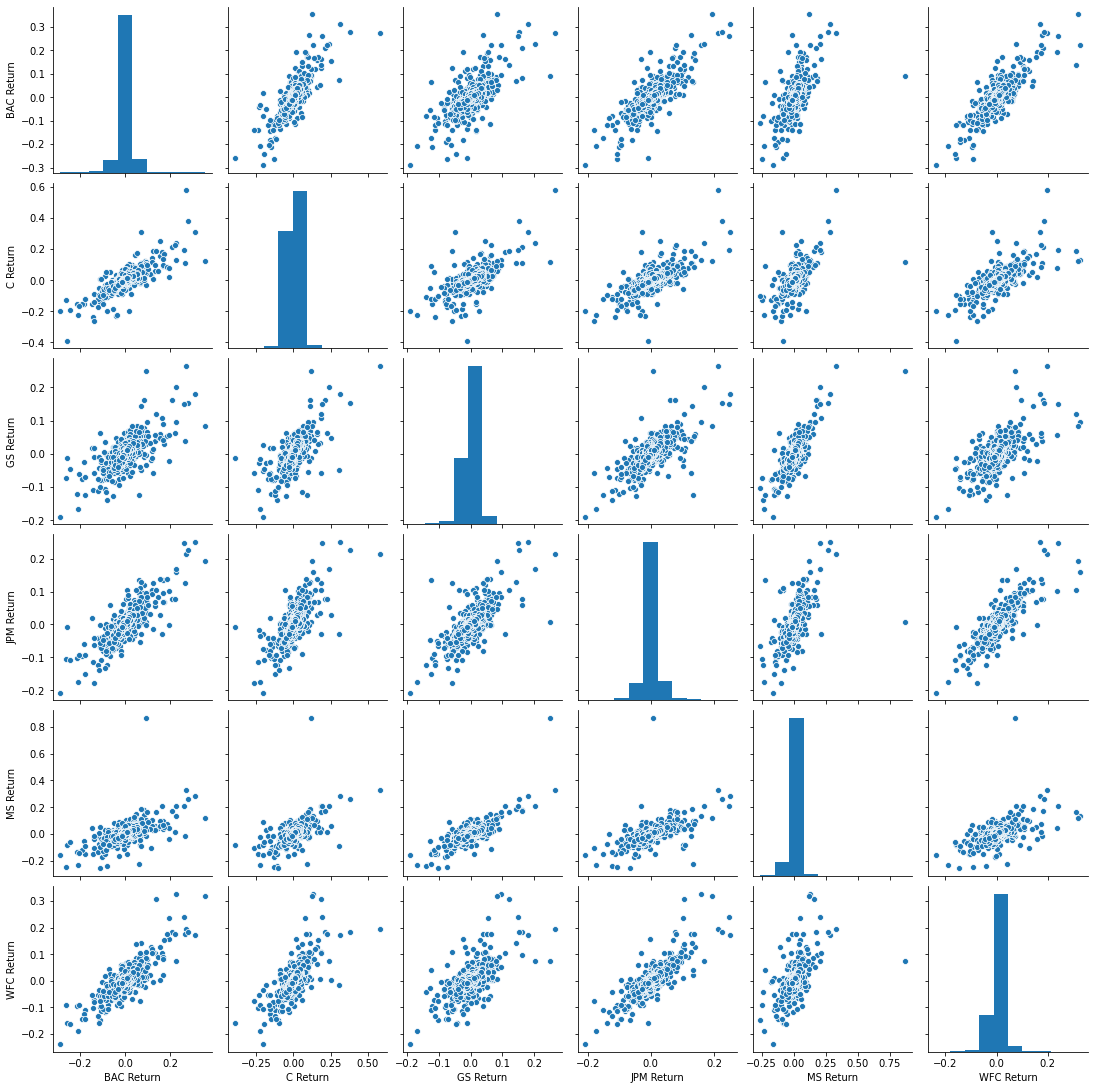

In [10]:
import seaborn as sns
sns.pairplot(returns[1:]) #Exclude first row

*Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

You'll also see the enormous crash in value if you take a look a the stock price plot (which we do later in the visualizations.)

*The data we are utilizing here shows something a bit different than the original dataset

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [11]:
returns.idxmin()
#Returns the min index value for every column, date is the index

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [12]:
returns.idxmax()
#Returns the max index value for every column, date is the index

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [13]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [14]:
returns.loc['2015-01-01':'2015-12-31'].std()
#Same as a between in SQL

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

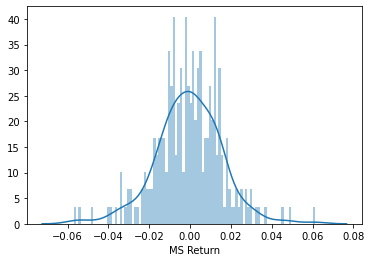

In [15]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'][1:],bins=100)
#Start from 1 to skip NaN

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

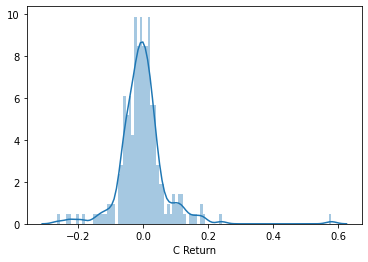

In [16]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'][1:],bins=100)
#Start from 1 to skip NaN

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
#import plotly
#import cufflinks as cf
#cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

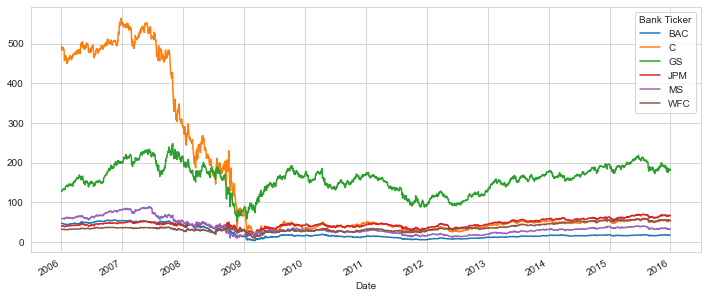

In [79]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,5))
plt.show()

In [78]:
#bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

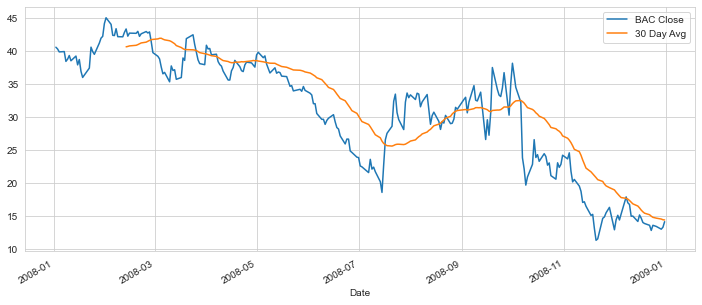

In [80]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2008-01-01':'2008-12-31']['BAC'].plot(label='BAC Close', figsize=(12,5))
bank_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2008-01-01':'2008-12-31']['BAC'].rolling(30).mean().plot(label='30 Day Avg', figsize=(12,5))
plt.legend()
plt.show()

#This one is very tricky...
#First I use the multi index function to get the BAC info
#Then the Loc between dates
#And I make use of the rolling function

** Create a heatmap of the correlation between the stocks Close Price.**

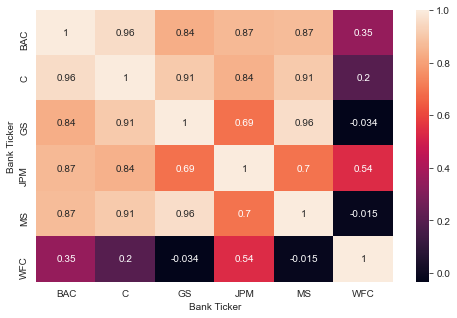

In [81]:
plt.figure(figsize=(8, 5))
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2008-01-01':'2008-12-31'].corr(),annot=True)
plt.show()

** Optional: Use seaborn's clustermap to cluster the correlations together:**

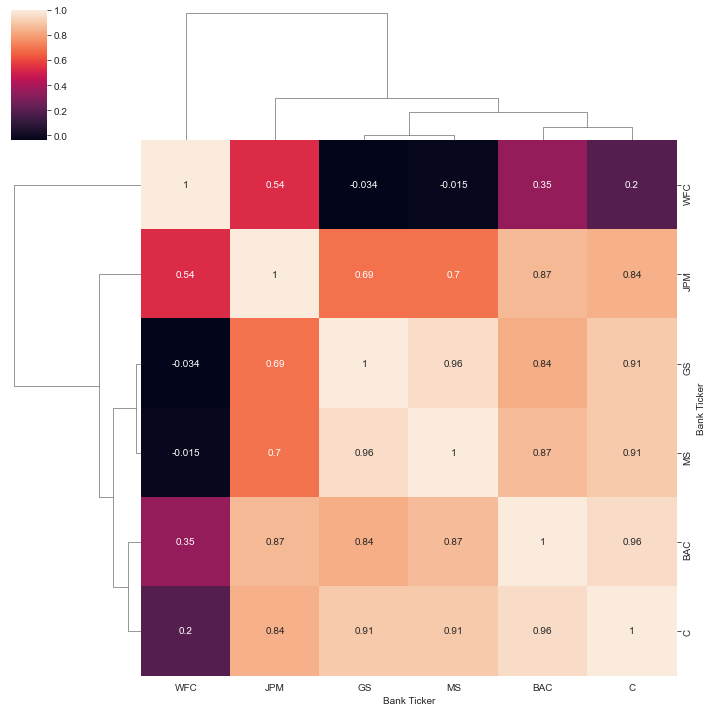

In [82]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2008-01-01':'2008-12-31'].corr(),annot=True)
plt.show()

In [75]:
#Plotly example of a heatmap
#bank_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2008-01-01':'2008-12-31'].corr().iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [83]:
#bank_stocks.loc['2015-01-01':'2015-12-31',(slice(None),('Open','Close','High','Low'))]['BAC'].iplot(kind='candle')
#I had to switch to using loc instead of xs as I needed multiple keys (open, close, high, high, low)

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [84]:
#bank_stocks.loc['2015-01-01':'2015-12-31',(slice(None),('Open'))]['MS'].ta_plot(study='sma')
#I used Opening price here since the question was a bit vague to me, but just an example

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [85]:
#bank_stocks.loc['2015-01-01':'2015-12-31',(slice(None),('Open'))]['BAC'].ta_plot(study='boll')
#I used Opening price here since the question was a bit vague to me, but just an example

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.